<a href="https://colab.research.google.com/github/AlejoArav/BIO266E/blob/master/GoogleColab/toggleswitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Toggle Switch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sp

# Simulación del sistema toggle switch propuesto por Gardner et al. (2000)

# Ecuaciones del toggle switch:

$$
\begin{align}
\frac{dU}{dt} &= \frac{\alpha_1}{1 + V^{\beta}} - U \\
\frac{dV}{dt} &= \frac{\alpha_2}{1 + U^{\gamma}} - V
\end{align}
$$

Donde cada uno de los parametros representa:

- $\alpha_1$: tasa de producción de la proteína U
- $\alpha_2$: tasa de producción de la proteína V
- $\beta$: coeficiente de Hill para la proteína U
- $\gamma$: coeficiente de Hill para la proteína V
- $U$: concentración de la proteína U
- $V$: concentración de la proteína V
- $t$: tiempo
- $\frac{dU}{dt}$: cambio en la concentración de la proteína U en el tiempo
- $\frac{dV}{dt}$: cambio en la concentración de la proteína V en el tiempo

# Parte 1. Simulación del modelo en el tiempo

In [ ]:
def toggle_switch(y0, t, params):

    # Parametros del sistema:
    alpha_u, alpha_v, beta, gamma = params

    # Variables
    u, v = y0

    # Ecuaciones del sistema
    dudt = alpha_u / (1 + v**beta) - u
    dvdt = alpha_v / (1 + u**gamma) - v

    return [dudt, dvdt]

In [ ]:
params = [
    4.5, # alpha_u
    4.5, # alpha_v
    3.0, # beta
    3.0   # gamma
]

y0 = [
    1.4 , # u0
    1.6   # v0
]

t = np.linspace(0, 100, 1000)

In [ ]:
resultados = integrate.odeint(toggle_switch, y0, t, args=(params,))

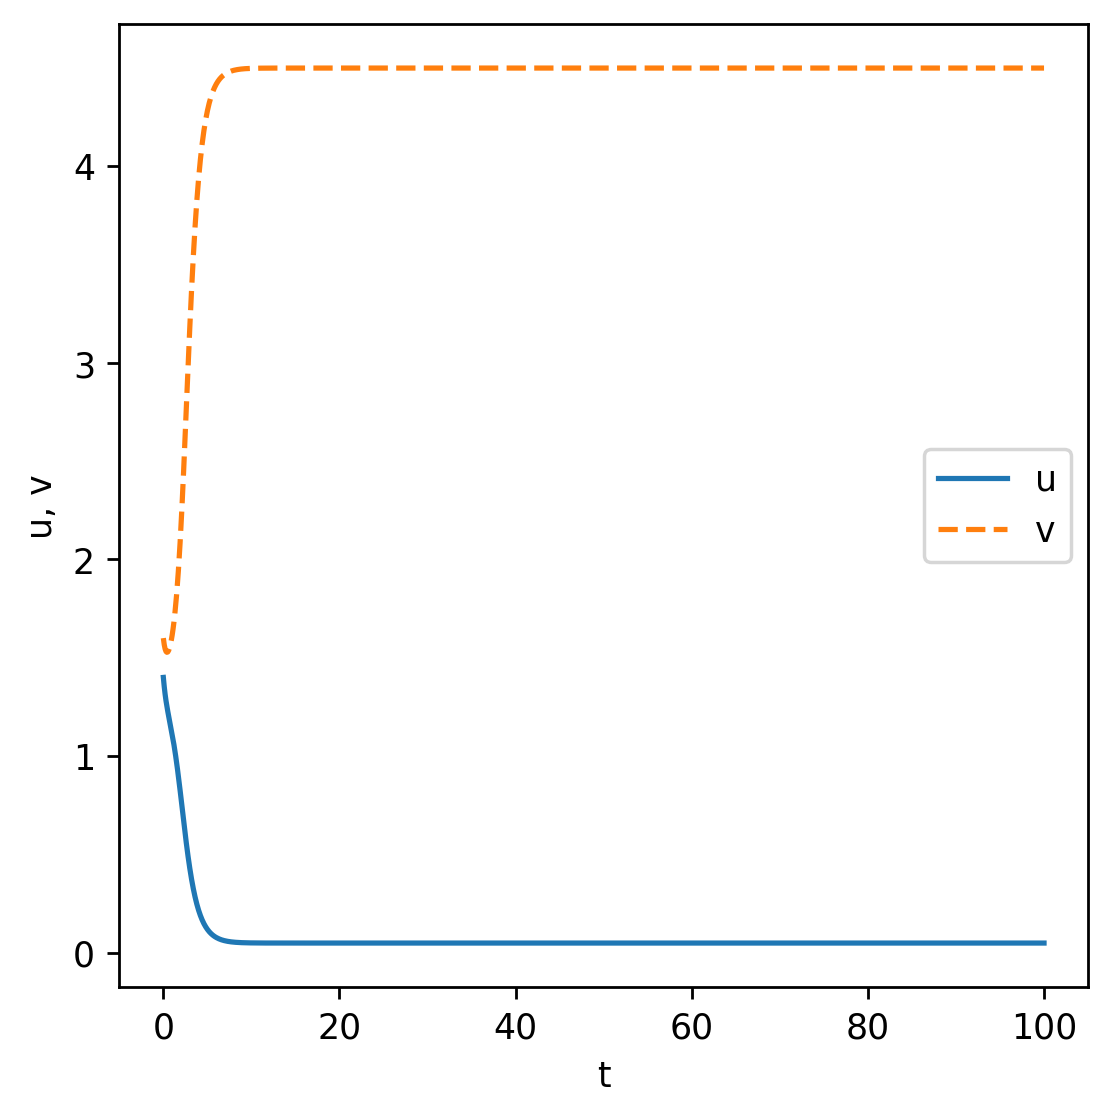

In [ ]:
plt.figure(figsize=(5, 5), dpi=250)
plt.plot(t, resultados[:,0], label='u')
plt.plot(t, resultados[:,1], label='v', ls="--")
plt.legend()
plt.xlabel('t')
plt.ylabel('u, v')
plt.show()

In [ ]:
resultados

array([[1.4       , 1.6       ],
       [1.35308864, 1.56663195],
       [1.31430865, 1.54471442],
       ...,
       [0.04886359, 4.49947505],
       [0.04886359, 4.49947505],
       [0.04886359, 4.49947505]])

# Parte 2. Encontrar los puntos de equilibrio del sistema

In [ ]:
def U_equilibrio(V, params):

    alpha_u, beta = params

    return alpha_u / (1 + V**beta)

def V_equilibrio(U, params):

    alpha_v, gamma = params

    return alpha_v / (1 + U**gamma)

## Tip: Les agregué un gráfico de fases para que vean como se comporta el sistema, las lineas con flechas indican hacia donde se mueve el sistema en el tiempo.

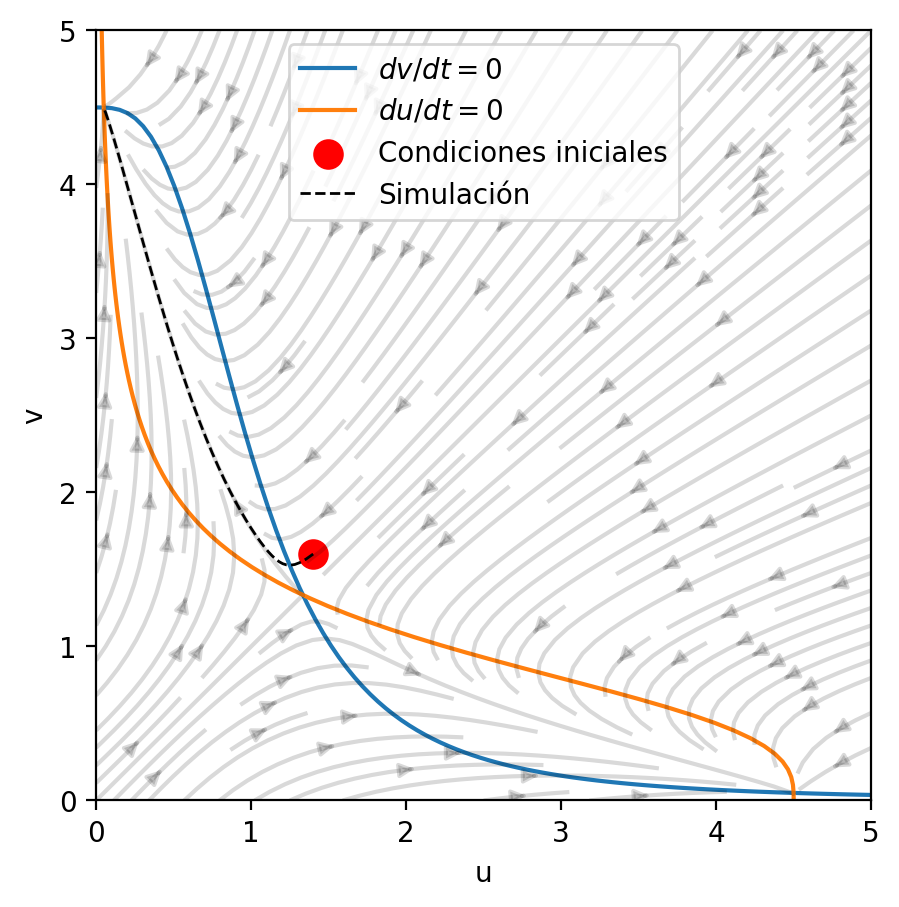

In [ ]:
# Definir un espacio de valores para U y V
U = np.linspace(0, 5, 100)
V = np.linspace(0, 5, 100)

# Evaluar la función de equilibrio en el espacio de valores
Ueq = U_equilibrio(V, [params[0], params[2]])
Veq = V_equilibrio(U, [params[1], params[3]])

# Figura
plt.figure(figsize=(5.0, 5.0), dpi=200)
plt.plot(U, Veq, label='$dv/dt = 0$')
plt.plot(Ueq, V, label='$du/dt = 0$')
plt.legend()

# Creamos una malla de valores para U y V
U, V = np.meshgrid(U, V)

# Definimos el sistema de ecuaciones nuevamente
dudt = U_equilibrio(V, [params[0], params[2]]) - U
dvdt = V_equilibrio(U, [params[1], params[3]]) - V

# Graficar el espacio de fases con un streamplot
plt.streamplot(U, V, dudt, dvdt, density=1.5, color=(0,0,0,0.15))
# Ademas agregamos el punto inicial de la simulación hecha anteriormente
plt.scatter(y0[0], y0[1], color='r', s=100, label='Condiciones iniciales')
plt.plot(resultados[:,0], resultados[:,1], lw=1, color='k', ls='--', label='Simulación')
plt.legend()
plt.xlabel('u')
plt.ylabel('v')
plt.show()

# Tarea 1A. Toggle

1. Simule el sistema para distintas condiciones iniciales y analice los gráficos que obtiene. ¿Qué observa cuando $U_0$ y $V_0$ son iguales? ¿Y cuando son distintas?

2. Simule el sistema con parámetros distintos a los proporcionados acá. ¿Qué cambios observa con los puntos de equilibrio? ¿Qué sucede si $\alpha_1 >> \alpha_2$ (o vice-versa)? ¿Qué sucede si $\beta >> \gamma$ (o vice-versa)? Utilize los gráficos de los puntos de equilibrio para explicar lo que observa.